In [83]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# for splitting the df
from sklearn.model_selection import train_test_split

from scipy import stats

# import to remove warnings
import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
# acquire data

df = pd.read_csv('imdbTop250.csv')

In [3]:
# quick look 

df.head()

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
0,1,1996,/title/tt0076759/,Star Wars,1977,121,"Action, Adventure, Fantasy",8.6,90.0,1254781,322.74,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2407245,28.34,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,Drama,8.1,83.0,645186,16.50,Danny Boyle,Ewan McGregor,Ewen Bremner,Jonny Lee Miller,Kevin McKidd
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,"Crime, Mystery, Thriller",8.5,77.0,1010775,23.34,Bryan Singer,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,NaN,51747,NaN,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN


In [4]:
# dtypes and nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6250 entries, 0 to 6249
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ranking   6250 non-null   int64  
 1   IMDByear  6250 non-null   int64  
 2   IMDBlink  6250 non-null   object 
 3   Title     6250 non-null   object 
 4   Date      6250 non-null   int64  
 5   RunTime   6250 non-null   int64  
 6   Genre     6250 non-null   object 
 7   Rating    6250 non-null   float64
 8   Score     5399 non-null   float64
 9   Votes     6250 non-null   int64  
 10  Gross     5465 non-null   float64
 11  Director  6250 non-null   object 
 12  Cast1     6250 non-null   object 
 13  Cast2     6250 non-null   object 
 14  Cast3     6242 non-null   object 
 15  Cast4     6242 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 781.4+ KB


In [5]:
df.shape

(6250, 16)

## Takeaways

- good size data set with some nulls
- Score, Gross, Cast 3 and 4 have nulls
- Rating is the target variable
- dtypes look as expected

# Prepare

- check for duplicate rows
- one hot encode genre
- take care of nulls in Score, Gross, Cast 3 and Cast 4
- split the df into train, validate and test sets

In [6]:
# drop duplicate rows

df = df.drop_duplicates()

In [7]:
# check shape now 

df.shape

(6250, 16)

### handling nulls in Score 

In [8]:
# check how many nulls 

df.Score.value_counts(dropna=False)

NaN      851
90.0     287
84.0     267
86.0     239
94.0     238
85.0     223
91.0     217
77.0     204
88.0     204
96.0     200
100.0    197
98.0     194
80.0     188
83.0     178
92.0     177
79.0     160
89.0     158
97.0     157
87.0     152
75.0     135
66.0     133
82.0     118
95.0     117
76.0     102
73.0      98
78.0      93
72.0      93
74.0      91
65.0      89
99.0      87
70.0      86
93.0      71
69.0      68
68.0      67
62.0      56
64.0      52
71.0      51
67.0      50
81.0      42
63.0      31
61.0      29
Name: Score, dtype: int64

<AxesSubplot:xlabel='Score'>

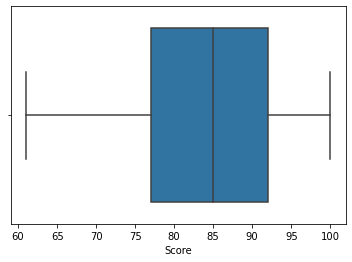

In [9]:
# check for outliers

sns.boxplot(x='Score', data=df)

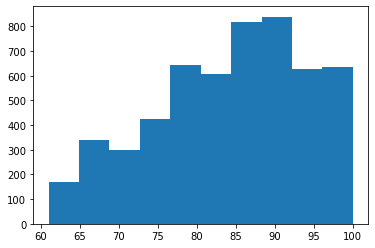

In [10]:
# visualize distribution 

df.Score.hist()
plt.grid(False)

- The Score variable has more movies with ratings higher than 75 than lower
- There do not seem to be manu outliers. 
- We will replace null values with the median score.

In [11]:
# find the median score 

median_score = df.Score.median()

In [12]:
# replace null values with the median score

df.Score = df.Score.replace(np.NaN, median_score)

In [13]:
# check any nulls remaining

df.Score.isnull().any()

False

### handling nulls in Gross

In [14]:
# find how many nulls

df.Gross.value_counts(dropna=False)

NaN      785
4.36      86
0.06      51
5.32      50
0.01      50
        ... 
13.54      1
45.88      1
31.84      1
1.53       1
11.50      1
Name: Gross, Length: 584, dtype: int64

<AxesSubplot:xlabel='Gross'>

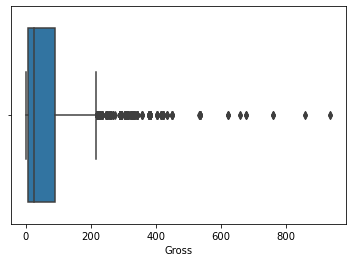

In [15]:
# check for outliers

sns.boxplot(x='Gross', data=df)

- The boxplot shows show upper outliers. 

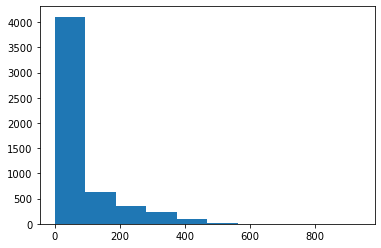

In [16]:
# visualize distribution 

df.Gross.hist()
plt.grid(False)

- The distribution seems left skewed possibly due to the outliers.
- We will replace the nulls in Gross with the median value as median is resistant to outliers.

In [17]:
# find the median value 

median_gross = df.Gross.median()

In [18]:
# replace null values with the median score

df.Gross = df.Gross.replace(np.NaN, median_gross)

In [19]:
# check any nulls remaining

df.Gross.isnull().any()

False

### handling nulls in Cast 3

In [20]:
df[df.Cast3.isnull()]

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,85.0,51747,26.24,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN
85,86,1996,/title/tt0104361/,A Grand Day Out,1989,23,"Animation, Short, Adventure",7.8,85.0,32153,26.24,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN
278,29,1997,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,85.0,51747,26.24,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN
435,186,1997,/title/tt0104361/,A Grand Day Out,1989,23,"Animation, Short, Adventure",7.8,85.0,32153,26.24,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN
533,34,1998,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,85.0,51747,26.24,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN
726,227,1998,/title/tt0104361/,A Grand Day Out,1989,23,"Animation, Short, Adventure",7.8,85.0,32153,26.24,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN
794,45,1999,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,85.0,51747,26.24,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN
1038,39,2000,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,85.0,51747,26.24,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN


- The nulls in Cast 3 seem to be all be for the same 2 movies.
- The movies have different IMDB years and the rank for each year.
- It seems Cast 3 and Cast 4 are nulls for those movies because there are only 2 actors in the cast of these movies.
- The cast columns have too many different actors for us to one hot encode.
- We will move forward without replacing the nulls and just drop the cast columns for now. 

In [21]:
# drop the cast columns with nulls

df = df.drop(columns=['Cast3', 'Cast4'])


<AxesSubplot:>

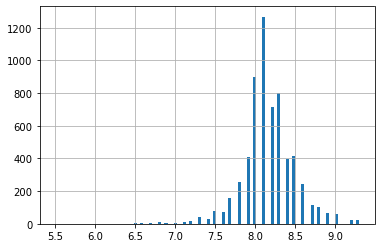

In [22]:
# visualize distribution of target variable: Rating

df.Rating.hist(bins=100)


- The target variable looks to be farly normally distributed.

In [80]:
### Univariate Exploration

# for col in df.columns:
#     plt.hist([col], bins=200)
#     plt.show()
    
    
def explore_univariate(df, cat_vars, cont_vars):
    '''
    This function takes in categorical and continuous variables as well as a pandas dataframe.
    It returns a bar plot for each categorical variable
    and a histogram and boxplot for each continuous variable.
    '''
    # plot frequencies for each categorical variable
    for var in cat_vars: 
        print('Bar Plot of ' + var)
        bp = df[var].hist()
        plt.xlabel(var)
        plt.ylabel('count')
        bp.grid(False)
        plt.show()
    
    # print histogram for each continuous variable
    for var in cont_vars:
        generate_hist(df, var)
        # creating boxplot for each variable
        plt.figure(figsize=(10,5))
        sns.boxplot(x=var, data=df,  palette="twilight_shifted")
        plt.title('Distribution of ' + var)
        plt.show()
        
def generate_hist(df, var):
    '''
    Helper function. Given a dataframe df and a variable to plot, this function will 
    generate and display a histogram for that variable.
    '''
    print ('Distribution of ' + var)
    df[var].hist(bins=100)
    plt.grid(False)
    plt.xlabel(var)
    plt.ylabel('Number of Movies')
    plt.show()


In [81]:
cat_vars = ['IMDByear','Genre']

cont_vars = ['Ranking','RunTime','Rating','Votes','Gross']

Bar Plot of IMDByear


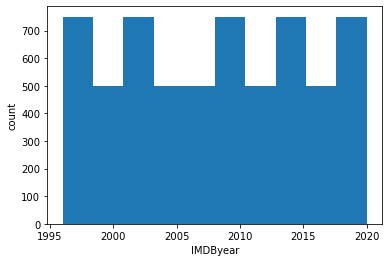

Bar Plot of Genre


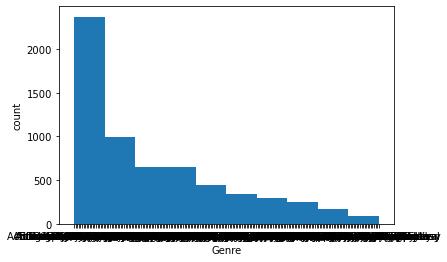

Distribution of Ranking


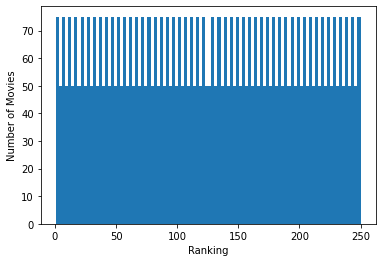

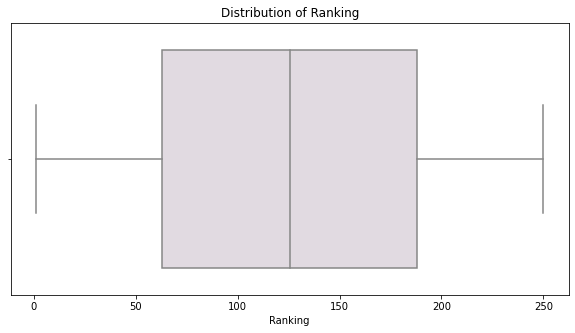

Distribution of RunTime


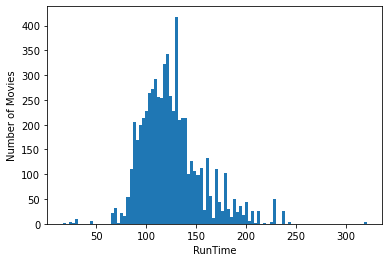

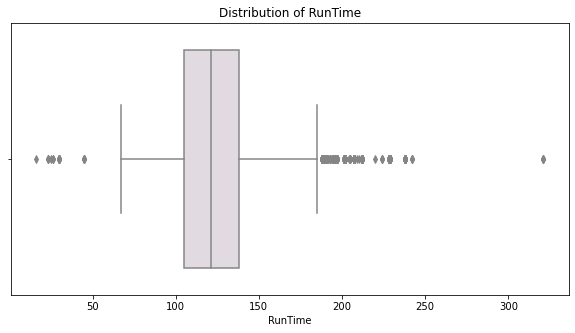

Distribution of Rating


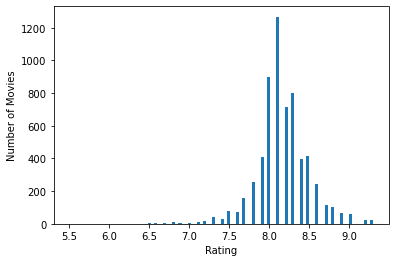

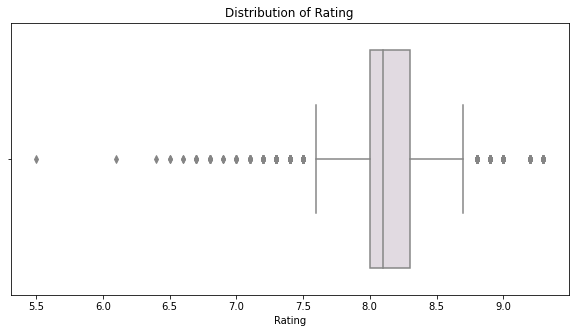

Distribution of Votes


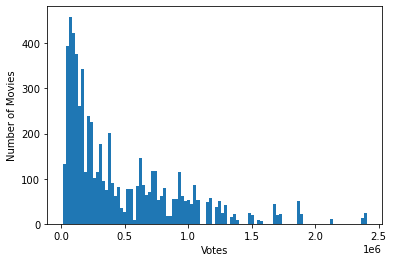

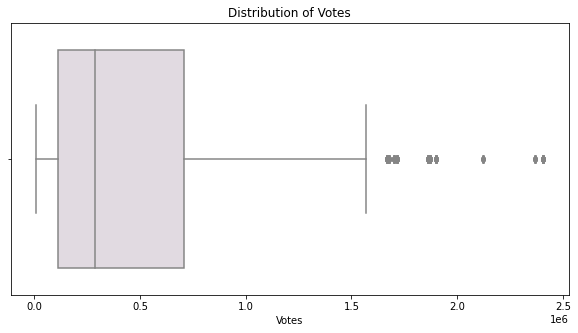

Distribution of Gross


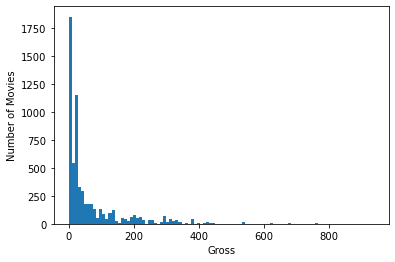

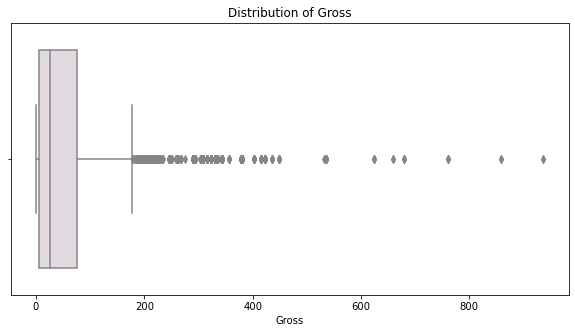

In [82]:
explore_univariate(df, cat_vars, cont_vars)

- There are some outliers in certain variables causing their distributions to be skewed. 
- We will apply a robust scaler to reduce the effect of outliers. 
- At this time we will proceed without doing nothing to the outliers.

In [56]:
# split df

def split_data(df, seed=123):
    '''
    This function takes in a pandas dataframe and a random seed. It splits the original
    data into train, test and split dataframes, prints out their shapes and returns the splits.
    Test dataset is 20% of the original dataset
    Train is 56% (0.7 * 0.8 = .56) of the original dataset
    Validate is 24% (0.3 * 0.7 = 0.24) of the original dataset
    '''
    train, test = train_test_split(df, train_size=0.8, random_state=seed)
    train, validate = train_test_split(train, train_size=0.7, random_state=seed)

    # Now that we have our 3 dataframes, print their shapes and return them    
    
    print(f'Shape of train split: {train.shape}')

    print ('----------------')

    print(f'Shape of test split: {validate.shape}')

    print ('----------------')

    print(f'Shape of validate split: {test.shape}')

    print ('----------------')

    return train, validate, test

In [58]:
train, validate, test = split_data(df)

Shape of train split: (3500, 14)
----------------
Shape of test split: (1500, 14)
----------------
Shape of validate split: (1250, 14)
----------------


### Bivariate Exploration

In [72]:
def explore_bivariate(df, target, cat_vars, cont_vars):
    '''
    This function takes in takes in a dataframe, the name of the target variable, a list of 
    the names of the categorical variables and a list of the names of the continuous variables. It returns
    bar plots for categorical variables and scatterplots for continuous variables.
    For each categorical variable, the bar plot shows the rating for each class in each category
    with a dotted line for the average overall rating. 
    The scatterplots show the relationship between continuous independent variables and the target variable.
    '''
    for var in cat_vars:
        # bar plot with overall horizontal line
        generate_barplot(df, target, var)
    for var in cont_vars:
        # creates scatterplot
        generate_scatterplot(df, target, var)
        
def generate_barplot(df, target, var):
    '''
    Helper function to generate barplots. Given a dataframe df, a target column and a 
    variable, this will generate and draw a barplot for that variable.
    '''
    overall_mean = df[target].mean()
    sns.barplot(var, target, data=df, palette="twilight_shifted")
    plt.xlabel('')
    plt.ylabel('Rating')
    plt.title('Bar plot of ' + var + ' vs ' + target)
    plt.axhline(overall_mean, ls = '--', color = 'grey')
    plt.show()


def generate_scatterplot(df, target, var):
    '''
    This function takes in a dataframe, the target variable and the independent variable which are both continuous. 
    It creates a scatter plot with the predictor as the x variable and the target as the y variable.
    '''
    sns.relplot(x=var, y=target, data=df)

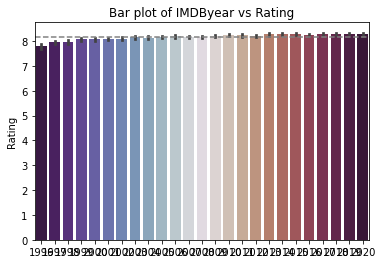

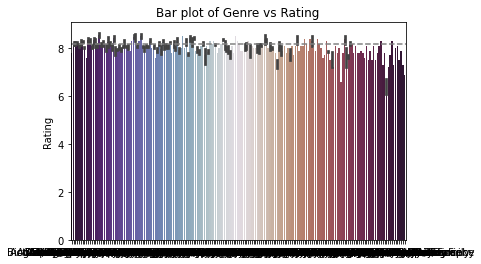

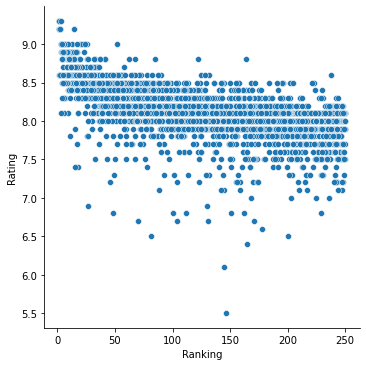

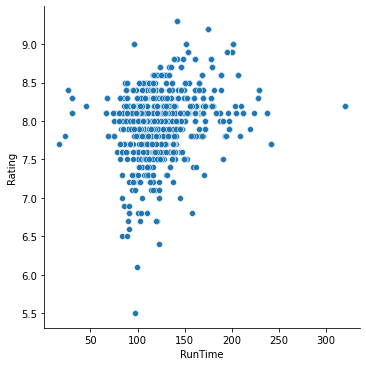

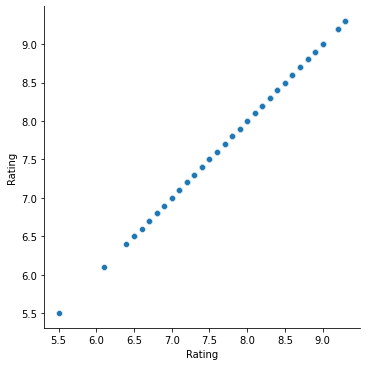

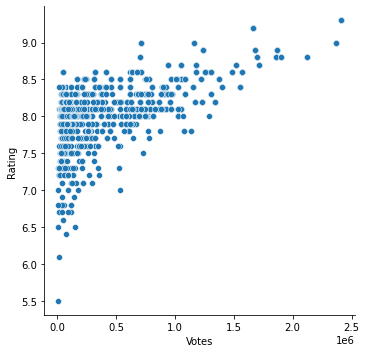

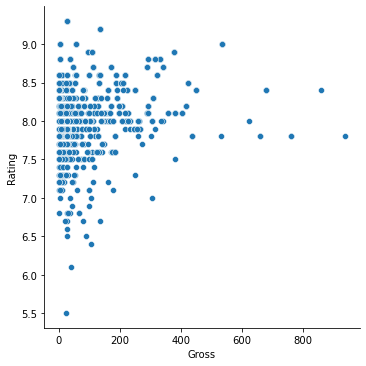

In [84]:
explore_bivariate(train, 'Rating', cat_vars, cont_vars)

### Takeaways

In [62]:
def explore_multivariate(train, target, cat_vars, cont_vars):
    '''
    This function takes in takes in a dataframe, the name of the target variable, a list of 
    the names of the categorical variables and a list of the names of the continuous variables.
    It generates scatterplots showing the target variable for each class of the categorical variables 
    against the continuous variables.
    '''
    for cat in cat_vars:
        for cont in cont_vars:
            sns.relplot(x=cont, y=target, data=train, hue=cat, palette ='twilight_shifted')
            plt.xlabel(cont)
            plt.ylabel(target)
            plt.title(cont + ' vs ' + target + ' by ' + cat)
            plt.show()

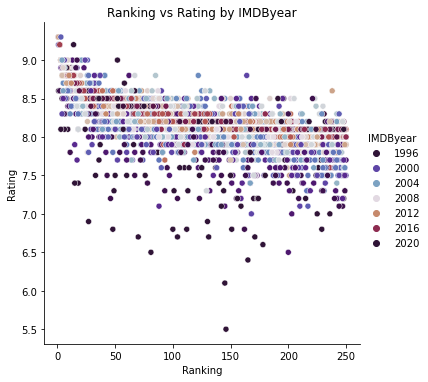

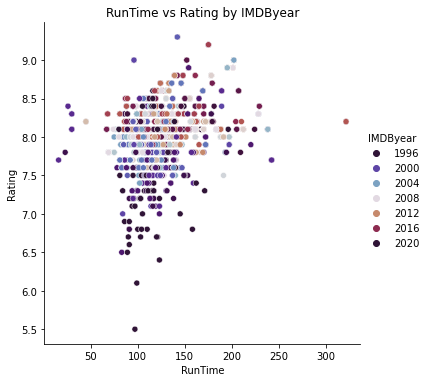

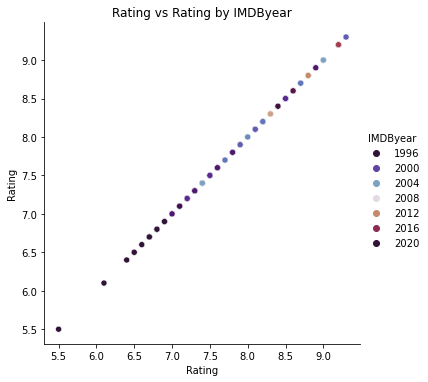

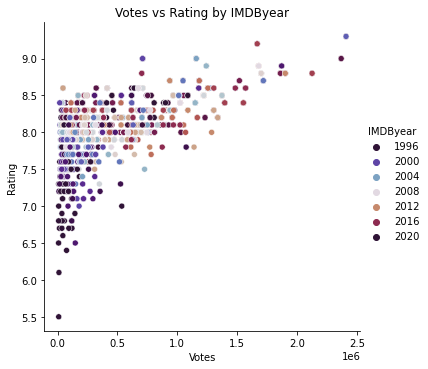

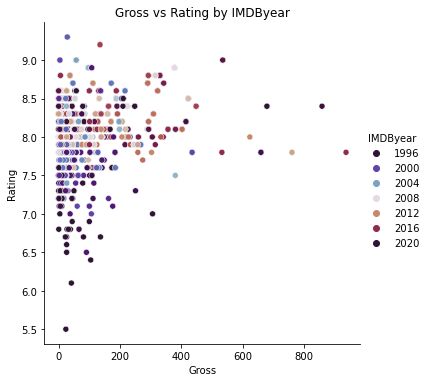

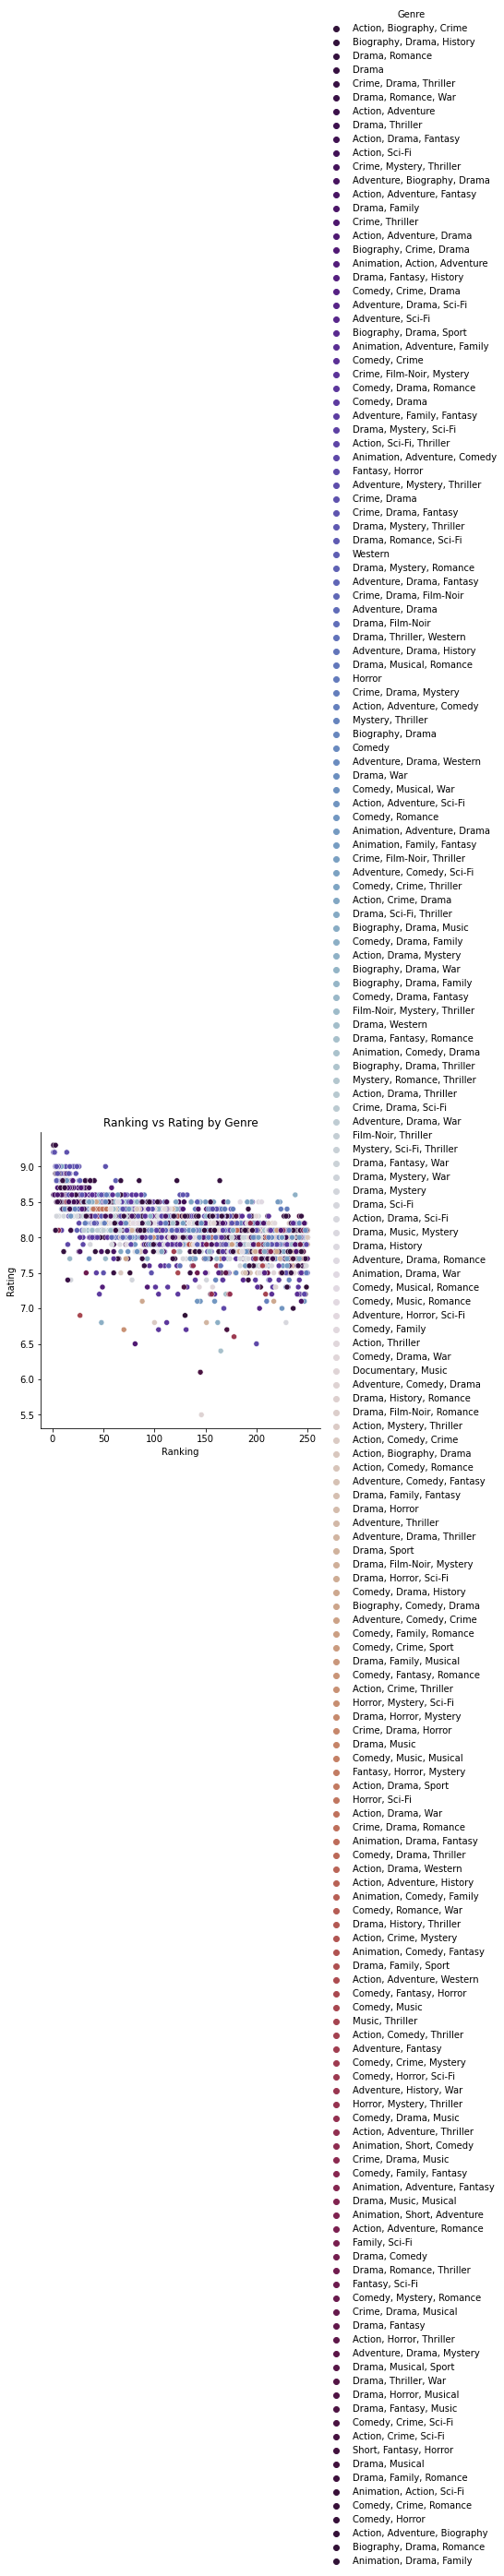

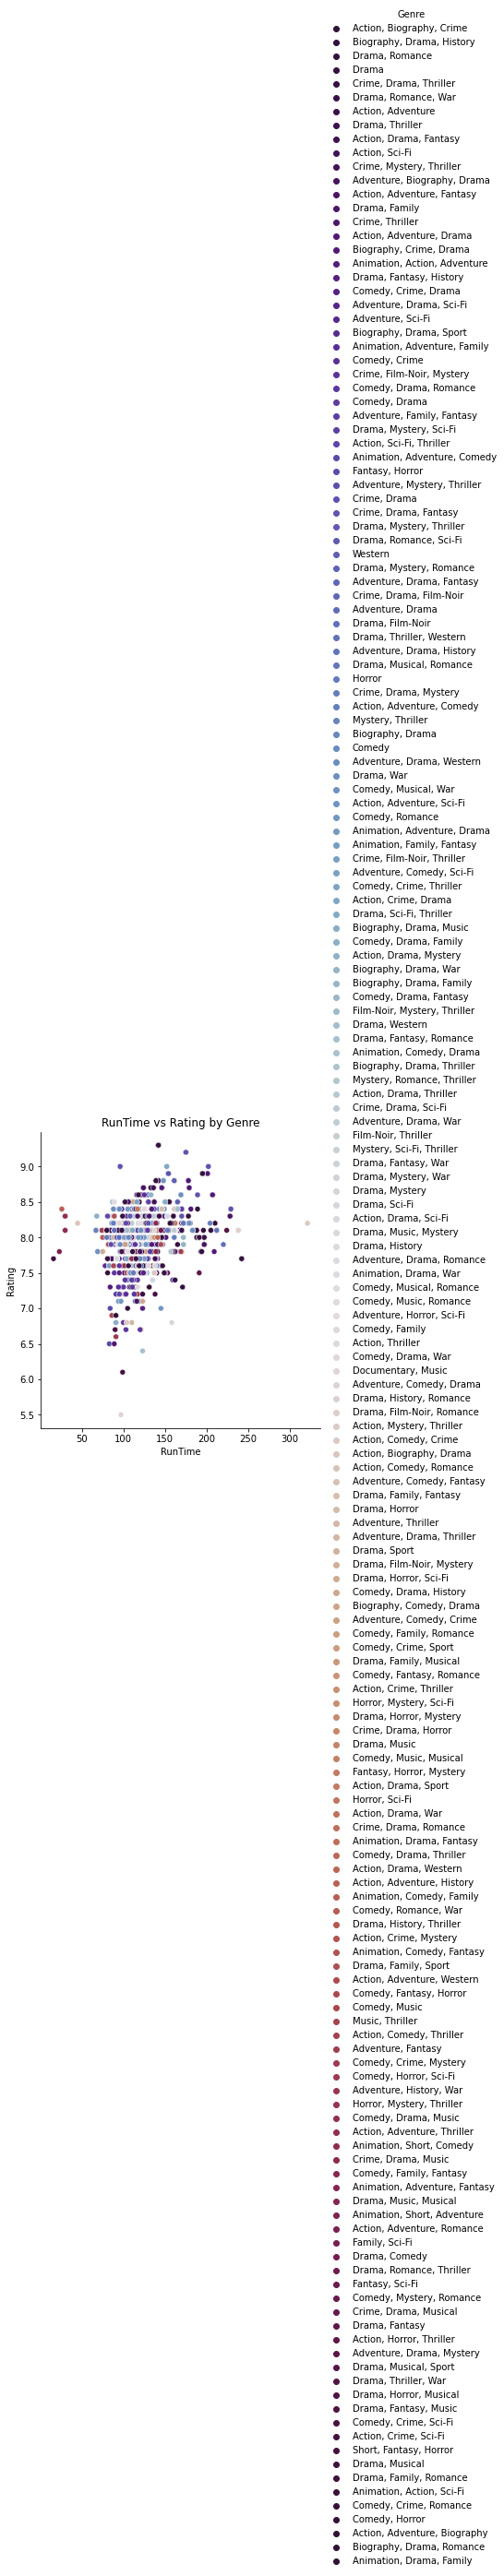

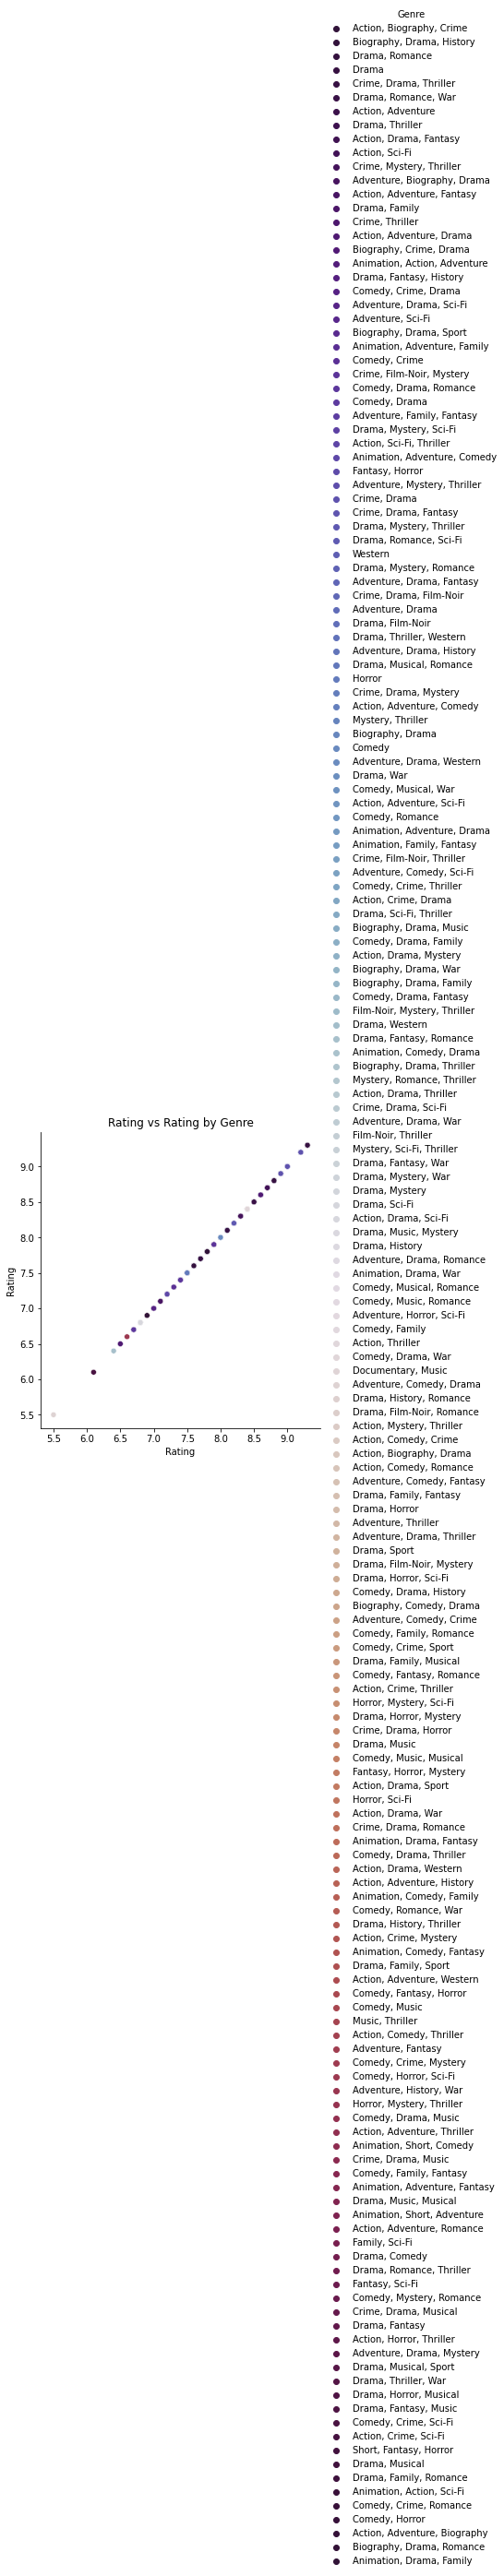

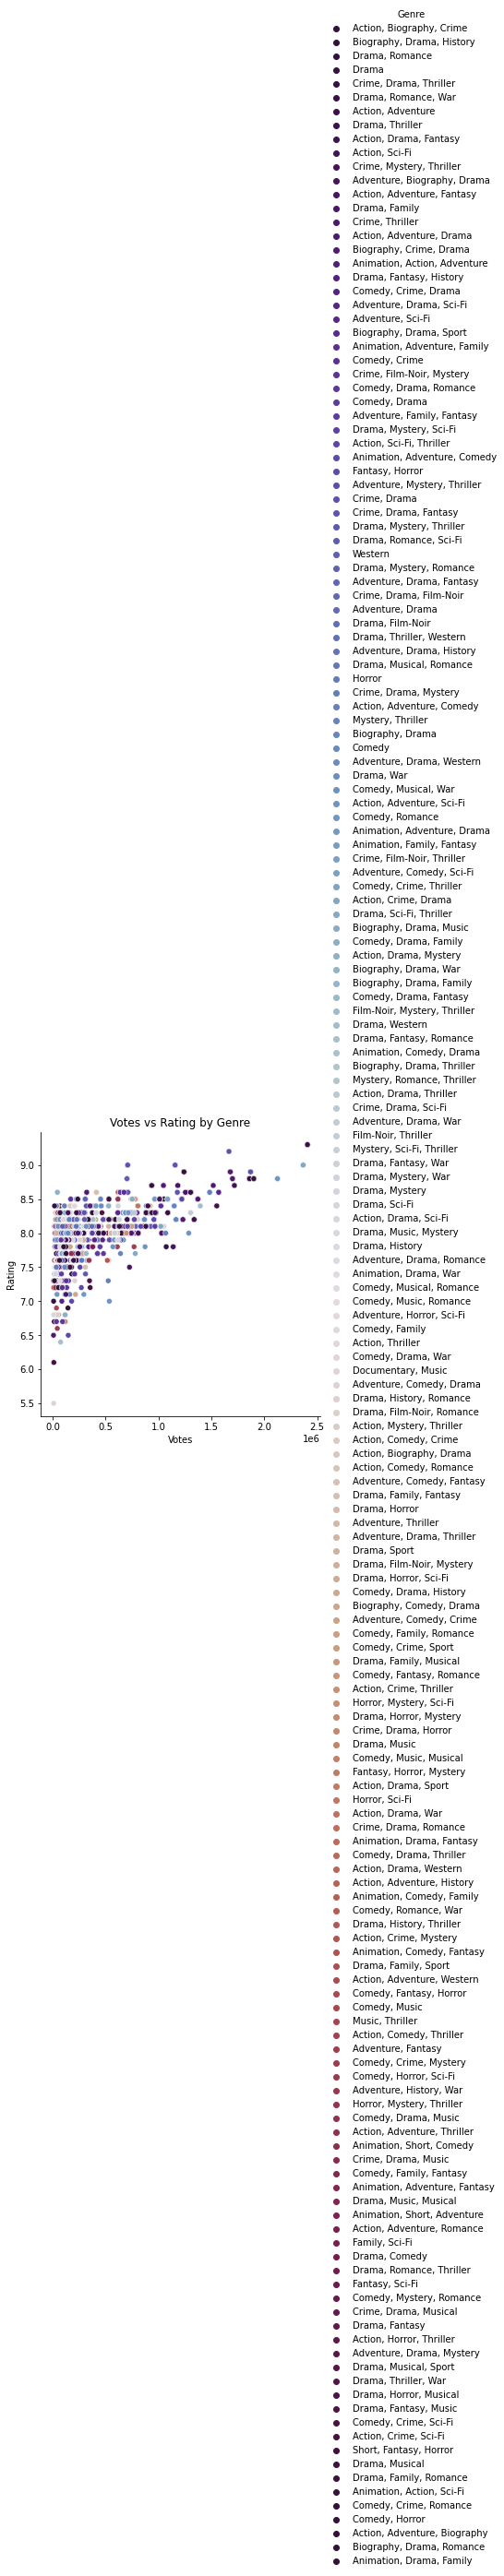

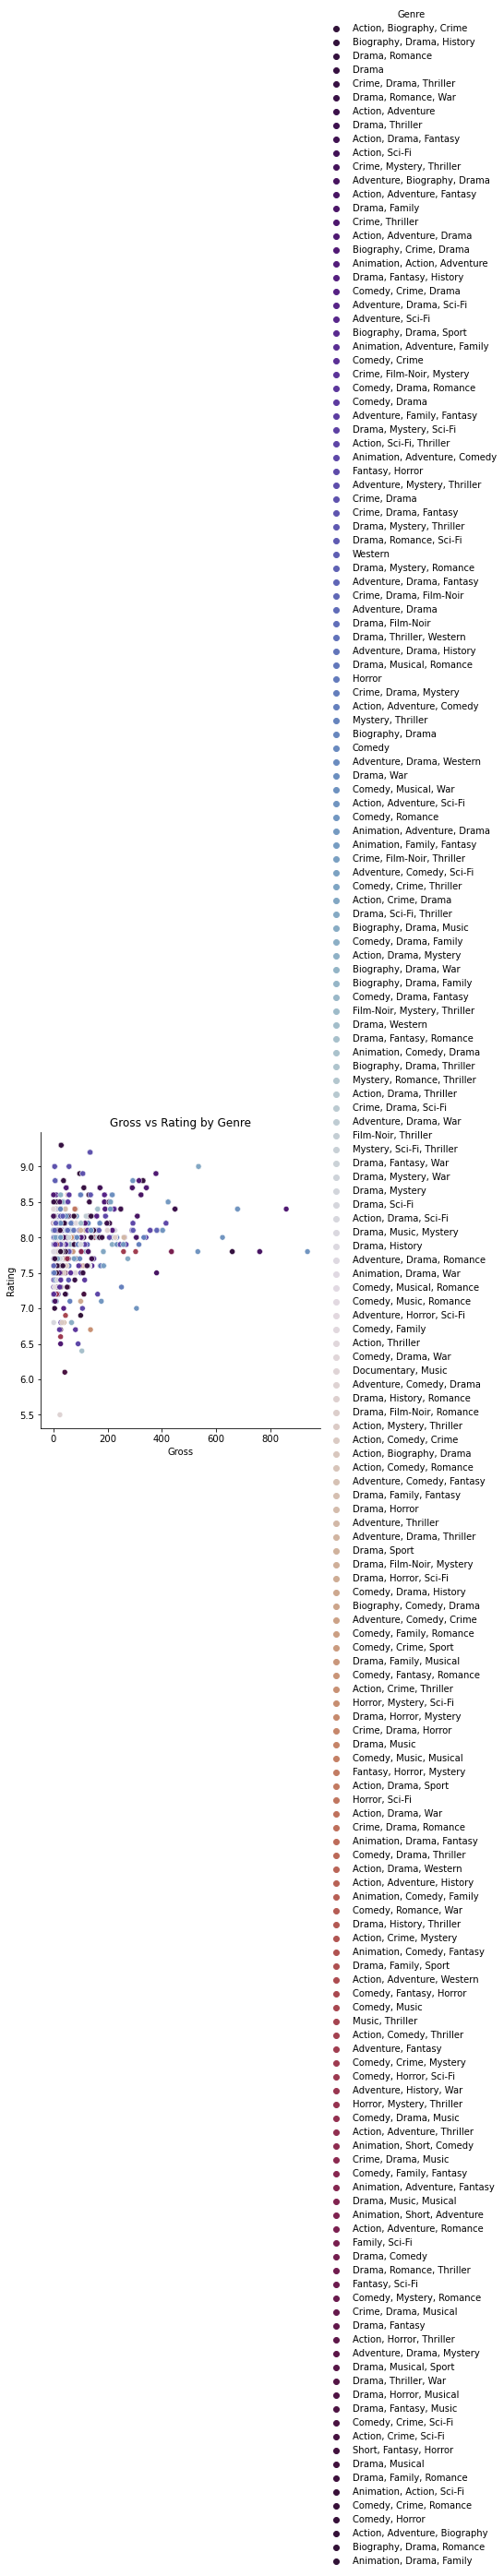

In [64]:
explore_multivariate(train, 'Rating', cat_vars, cont_vars)

In [66]:
df.Genre.value_counts()

Drama                           496
Crime, Drama                    294
Crime, Drama, Thriller          210
Biography, Drama, History       206
Drama, War                      173
                               ... 
Action, Adventure, Biography      1
Drama, Musical                    1
Short, Fantasy, Horror            1
Action, Drama, Fantasy            1
Horror, Thriller                  1
Name: Genre, Length: 197, dtype: int64

In [67]:
def create_heatmap(train, cols):
    '''
    This function takes in the training split as well as the columns to find correlation for. 
    It creates a correlation matrix and then displays a heatmap showing all of the correlations. 
    The highest correlation values have the darkest colors in this heatmap.
    '''
    corr_matrix = train[cols].corr()
    plt.figure(figsize=(15,8))
    sns.heatmap(corr_matrix, cmap='twilight_shifted', annot=True, linewidth=0.5, mask= np.triu(corr_matrix))
    plt.title('Correlation with the target and among features in the train split')
    plt.show()

In [70]:
cols = ['Votes', 'Gross', 'Ranking', 'Rating', 'RunTime']

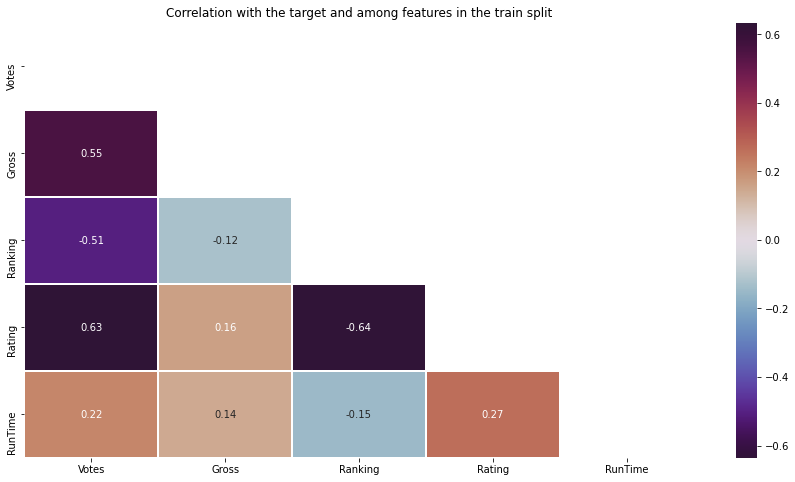

In [71]:
create_heatmap(train, cols)

### Takeaways

- highest correlation is negative correlation of -.64 of ranking with rating 
    - Higher ranking, lower rating 
- Number of votes has the next highest correlation of 0.63 with rating 
    - more votes, higher rating
- Number of votes is also correlated with gross and ranking
- There does not seem to be much correlation among the other variables

### Statistical testing

### do movies with runtime less than 150 have lower ratings

H0: Mean rating for movies with runtime less than 150mins is equivalent to those with more than 150mins runtime

Ha: Mean rating for movies with runtime less than 150mins is lower than those with more than 150mins runtime

For a 1-tailed test where our alternative hypothesis is testing for "lower than", we evaluate 𝑝/2 < 𝛼 and 𝑡 > 0.


In [78]:
alpha = 0.05 

t, p = stats.ttest_ind(train[train.RunTime < 150].Rating, train[train.RunTime > 150].Rating)


In [79]:
p/2 < alpha

True

- Since p/2 is less than alpha, we reject the null and can say that movies with runtimes lower than 150mins have lower ratings.